#  performance

In [58]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["performance.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_performance=df
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std,scenario
0,hpccfft,16,1,1,13.992950,0.323841,none
1,hpccdgemm,16,1,1,25.216550,1.277601,none
2,hpccstream,16,1,1,4.469498,0.425021,none
3,nasep,16,1,1,959.135000,14.159311,none
4,hpccrandomringbw,16,1,1,1.063333,0.050951,none
5,hpccfft,16,1,1,10.255470,0.579664,cpumem
6,hpccdgemm,16,1,1,31.255650,0.300835,cpumem
7,hpccstream,16,1,1,2.759928,0.017746,cpumem
8,nasep,16,1,1,942.582500,13.036327,cpumem
9,hpccrandomringbw,16,1,1,0.983899,0.300101,cpumem


In [59]:
# df_performance = df_performance.join(df_time1.set_index('scenario'), on='scenario')
# df_performance['model_time_mean']=df_performance['model_time_mean']/df_performance['duration_sum']

In [60]:
# df_performance

   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std  \
0    hpccfft      16       1         1        13.992950        0.323841   
5    hpccfft      16       1         1        10.255470        0.579664   
10   hpccfft      16       1         1        10.917475        1.604292   
15   hpccfft      16       1         1        10.833775        1.639560   

              scenario  
0                 none  
5               cpumem  
10        cpumem-scale  
15  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std  \
1   hpccdgemm      16       1         1        25.216550        1.277601   
6   hpccdgemm      16       1         1        31.255650        0.300835   
11  hpccdgemm      16       4         4        34.438000        0.467004   
16  hpccdgemm      16       4        16        37.738175        0.259058   

              scenario  
1                 none  
6               cpumem  
11        cpumem-scale  
16  cpumem-granula

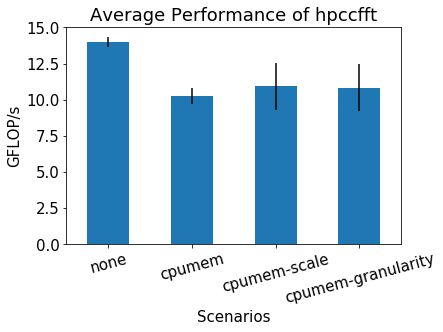

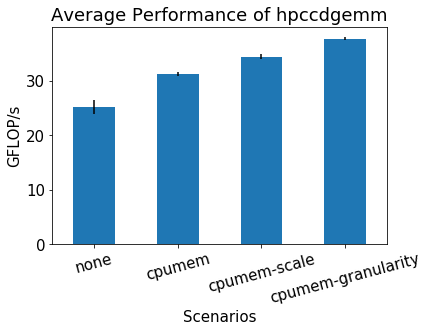

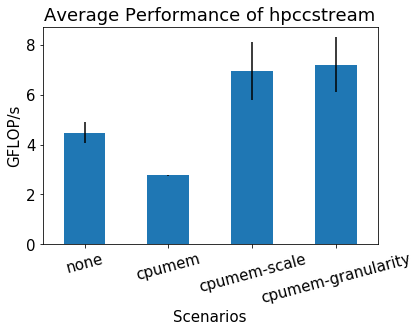

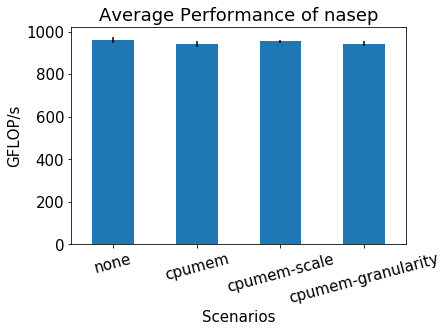

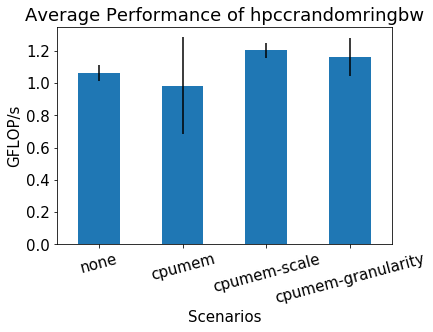

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Performance of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("GFLOP/s")
    
plt.savefig('performance.pdf',bbox_inches='tight',pad_inches=0.1)

#  time

In [66]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["time.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_time=df
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
0,hpccfft,16,1,1,292.75,291.126583,186.50,5.678908,0.25,0.433013,518.806634,299.441860,none
1,hpccdgemm,16,1,1,76.25,125.720673,1538.75,66.555898,0.00,0.000000,1648.353381,150.685531,none
2,hpccstream,16,1,1,198.00,336.595455,320.25,29.810862,0.00,0.000000,554.787557,314.819619,none
3,nasep,16,1,1,149.25,251.580380,971.75,13.754545,0.00,0.000000,1156.268549,254.981973,none
4,hpccrandomringbw,16,1,1,482.00,291.218990,829.00,46.005434,0.00,0.000000,1344.666387,323.697629,none
5,hpccfft,16,1,1,273.25,271.607598,225.75,4.437060,0.00,0.000000,533.438700,277.859203,cpumem
6,hpccdgemm,16,1,1,110.25,163.261102,1176.25,24.035131,0.25,0.433013,1324.730745,159.382556,cpumem
7,hpccstream,16,1,1,150.75,253.601434,436.50,4.821825,0.25,0.433013,622.539032,251.855774,cpumem
8,nasep,16,1,1,154.50,192.785503,955.50,12.658989,0.00,0.000000,1146.229419,190.320851,cpumem
9,hpccrandomringbw,16,1,1,468.50,284.737159,1012.00,343.817539,0.00,0.000000,1517.845051,578.187561,cpumem


   benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  run_mean  \
0    hpccfft      16       1         1     292.75  291.126583    186.50   
5    hpccfft      16       1         1     273.25  271.607598    225.75   
10   hpccfft      16       1         1     326.25  339.589734    215.00   
15   hpccfft      16       1         1     316.75  324.945669    220.75   

      run_std  final_mean  final_std  duration_mean  duration_std  \
0    5.678908        0.25   0.433013     518.806634    299.441860   
5    4.437060        0.00   0.000000     533.438700    277.859203   
10  16.077935        0.00   0.000000     579.587619    330.125891   
15  21.405315        0.00   0.000000     571.777359    312.228635   

              scenario  
0                 none  
5               cpumem  
10        cpumem-scale  
15  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  run_mean  \
1   hpccdgemm      16       1         1      76.25  125.720673   1538.75   
6

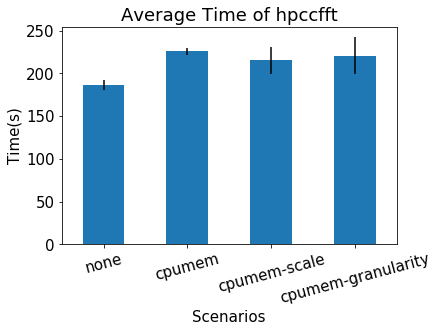

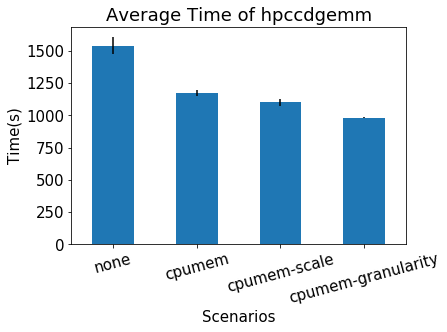

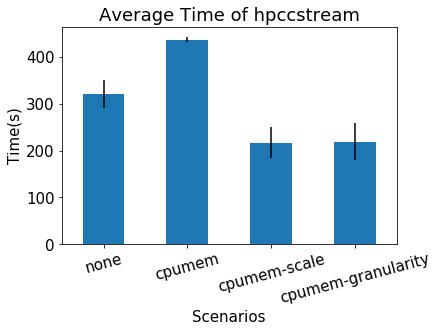

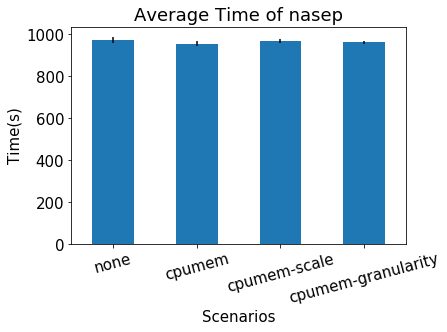

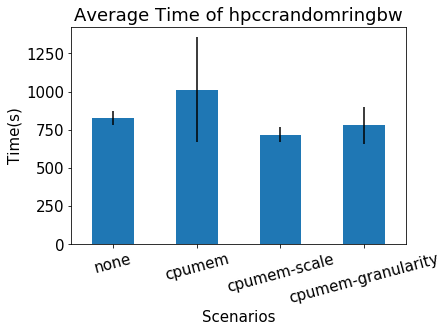

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='run_mean',
                  yerr='run_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Time of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("Time(s)")
    
plt.savefig('time.pdf',bbox_inches='tight',pad_inches=0.1)

#  time slot

In [30]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["appsum.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)

In [31]:
df_time1=df
df_time1

,scenario,init_sum,run_sum,final_sum,duration_sum
0,none,4793.0,15385.0,1.0,2544.0
1,cpumem,4629.0,15224.0,2.0,3139.0
2,cpumem-scale,4426.0,12884.0,0.0,2399.0
3,cpumem-granularity,4283.0,12647.0,0.0,2583.0


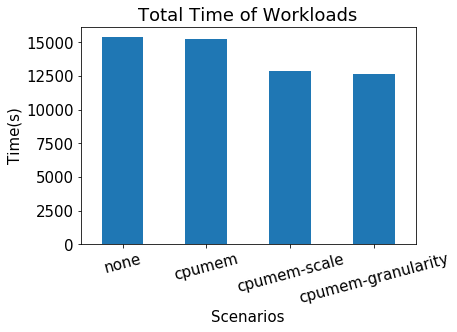

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# for model_name in df_time1['benchmark'].unique():
#     df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
# df_bench['run_sum'] = df_time1['run_sum']

# plot grouped bar chart
df_time1.plot(x='scenario',
              y='run_sum',
                kind='bar',
                stacked=True,
                title=f"Total Time of Workloads",
             legend=None)
plt.xticks(rotation=15) 
plt.xlabel("Scenarios")
plt.ylabel("Time(s)")
    
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)

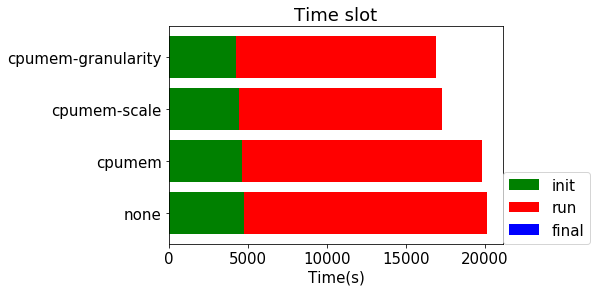

In [64]:
import numpy as np
import matplotlib.pyplot as plt

color=['green','red','blue']

y2 = df_time1['init_sum']
y3 = df_time1['run_sum']
y4 = df_time1['final_sum']

labels = df_time1['scenario']

plt.barh(labels, y2, color='green', label='init')
plt.barh(labels, y3, left=y2, color='red', label='run')
plt.barh(labels, y4, left=y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[1, 0])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
# plt.show()
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)